## Assignment 9: The goal of this assignment is to practice writing functions in R.

### In the code chunk below, I set up created test data and established a mode function that will be used throughout the assignment.  The code chunks that follow will create functions and test them out.

In [41]:
library(ggplot2)

#Creates test data
testmatrix <- matrix(c(c(1,2,NA, 5, 4, 6, 7), c(4,6,10, NA, 8, 5, 4), c(5,5,7,9,11, 9, 5), c("a", "b", "a", "d", NA, "a", "b"), c("v", "c", "c", "l", "k", "k", "l")), nrow = 7, ncol = 5, byrow = FALSE, dimnames = list(NULL,c("num1", "num2","num3", "char1", "char2")))
testdata <- data.frame(testmatrix)
testdata$num1 = as.numeric(as.character(testdata$num1))
testdata$num2 = as.numeric(as.character(testdata$num2))
testdata$num3 = as.numeric(as.character(testdata$num3))
testdata$char1 = as.character(testdata$char1)
testdata$char2 = as.character(testdata$char2)

# Creates mode function
calculate_mode <- function(x) {
  uniqx <- unique(x)
  uniqx[which.max(tabulate(match(x, uniqx)))]
    }

testdata

num1,num2,num3,char1,char2
1,4,5,a,v
2,6,5,b,c
NA,10,7,a,c
5,NA,9,d,l
4,8,11,NA,k
6,5,9,a,k
7,4,5,b,l


### 1.	Write a function that inputs a dataset (data frame) and outputs the number of missing values in each variables

In [42]:
returnmissing <- function(d)
{
  for(i in 1 : ncol(d))
    {print(sum(is.na(d[,i])))}
  
}

returnmissing(testdata)

[1] 1
[1] 1
[1] 0
[1] 1
[1] 0


### 2.  Write a function that inputs a dataset and outputs the names of variables with missing values

In [43]:
returnmissingnames <- function(d)
  {
  for(i in 1 : ncol(d)) 
  {if(sum(is.na(d[,i])))
  {print(colnames(d[i]))}
  }
}

returnmissingnames(testdata)

[1] "num1"
[1] "num2"
[1] "char1"


### 3. Write a function that inputs a dataset and outputs (1) the names of variables with missing values and (2) the corresponding number of missing values in each variables

In [44]:
combo1and2 <- function(d)
  {
  for(i in 1 : ncol(d)) 
  {if(sum(is.na(d[,i])))
  {print(c(colnames(d[i]), (sum(is.na(d[,i])))))
       }
  }
}

combo1and2(testdata)

[1] "num1" "1"   
[1] "num2" "1"   
[1] "char1" "1"    


### 4.	Write a function that inputs a dataset and output a dataset with missing values handled as follows: Missing values of numeric variables are replaced by the means of the non-missing values in the variables.  Missing values of categorical variables are replaced by the most frequent category in the variables

In [45]:
replacement <- function(d)
{
  for(i in 1:ncol(d))
  {if(is.numeric(d[,i]))
  {d[,i][is.na(d[,i])] = mean(d[,i],na.rm = TRUE)}
else {
 d[,i][is.na(d[,i])] = calculate_mode(d[,i]) 
}
  }
  return(d)
}

replacement(testdata)

num1,num2,num3,char1,char2
1.000000,4.000000,5,a,v
2.000000,6.000000,5,b,c
4.166667,10.000000,7,a,c
5.000000,6.166667,9,d,l
4.000000,8.000000,11,a,k
6.000000,5.000000,9,a,k
7.000000,4.000000,5,b,l


### 5.	Write a function that input a dataset and output (1) sub-dataset containing categorical variables and (2) sub-dataset containing numeric variables

In [46]:
sort <- function(d) 
    { 
  numericdata <- NULL
characterdata <- NULL
n=1
m = 1
  for(i in 1:ncol(d))
 
{
    if(is.numeric(d[,i]))
{
  numericdata <- data.frame(cbind(numericdata, d[,i]))
  names(numericdata)[n] = names(d)[i]
  n = n+1
}
    else if(is.numeric(d[,i])==FALSE)
    {
     characterdata <- data.frame(cbind(characterdata, d[,i]))
    colnames(characterdata)[m] = colnames(d)[i]
    m = m+1
     }
  }
  print(numericdata)
  print(characterdata)
}
sort(testdata)

  num1 num2 num3
1    1    4    5
2    2    6    5
3   NA   10    7
4    5   NA    9
5    4    8   11
6    6    5    9
7    7    4    5
  char1 char2
1     a     v
2     b     c
3     a     c
4     d     l
5  <NA>     k
6     a     k
7     b     l


### 6.	Write a function that inputs a dataset and output density curves of all numeric variables.

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

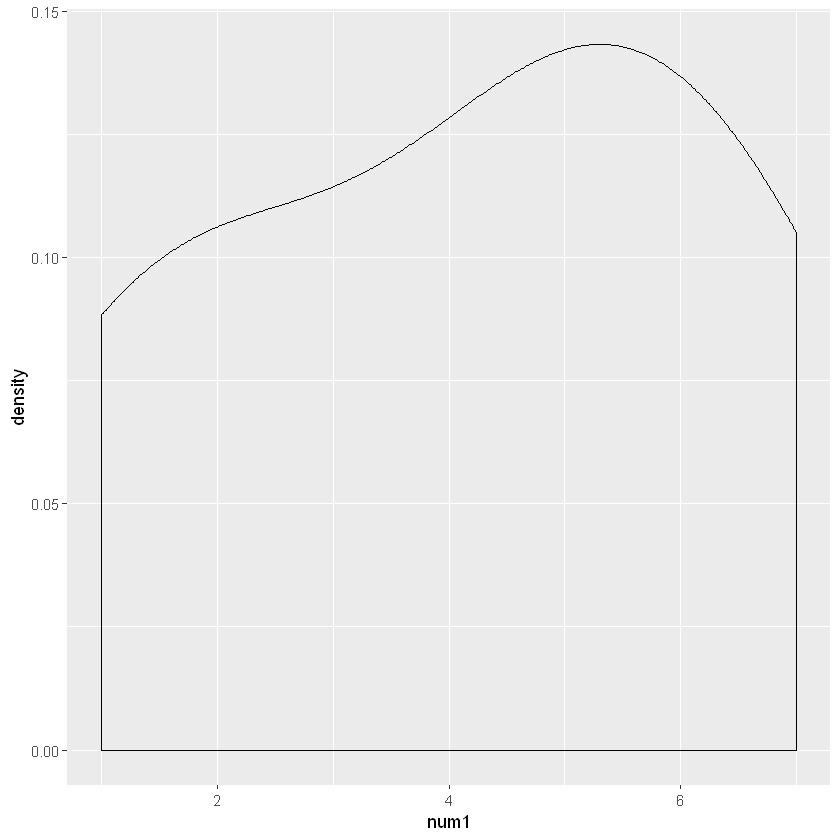

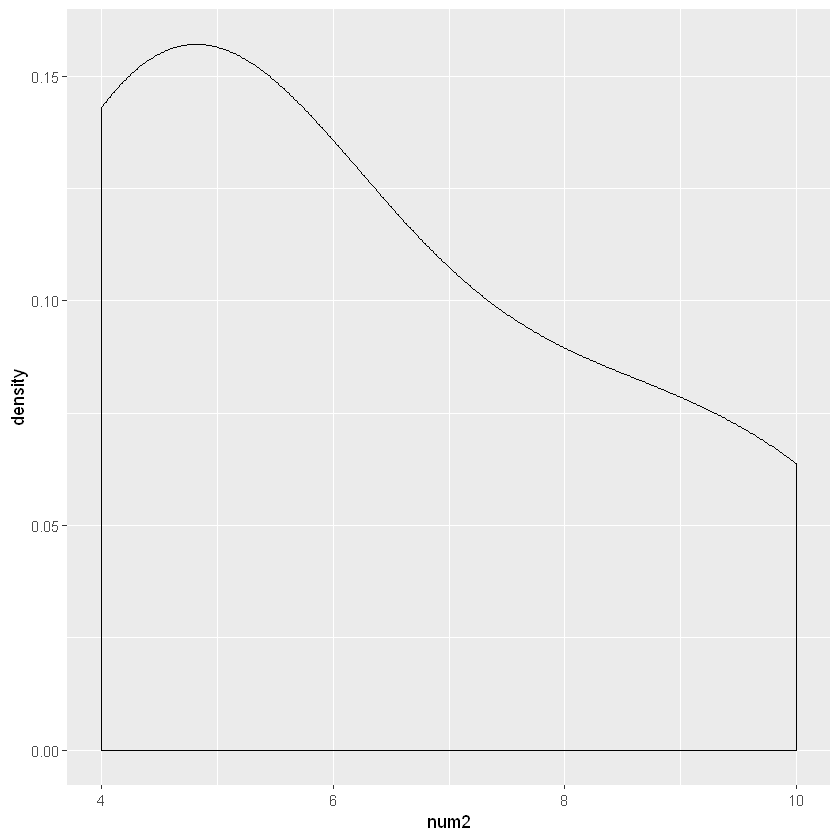

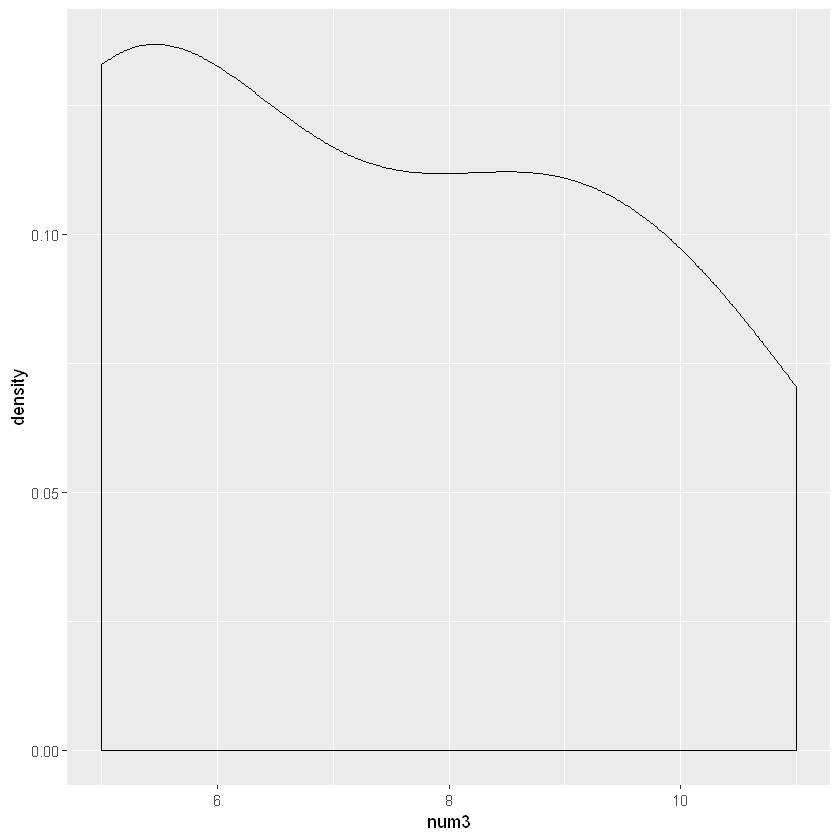

In [47]:
densityall <- function(d)
{
  for(i in 1:ncol(d))
   {if(is.numeric(d[,i]))
   {print(ggplot(d) + geom_density(mapping = aes(x=d[,i], color = NULL))+labs(x = names(d)[i]), na.rm = TRUE)}
  }
}

densityall(testdata)

### 7.	Write a function that inputs a dataset and output bar charts of all categorical variables

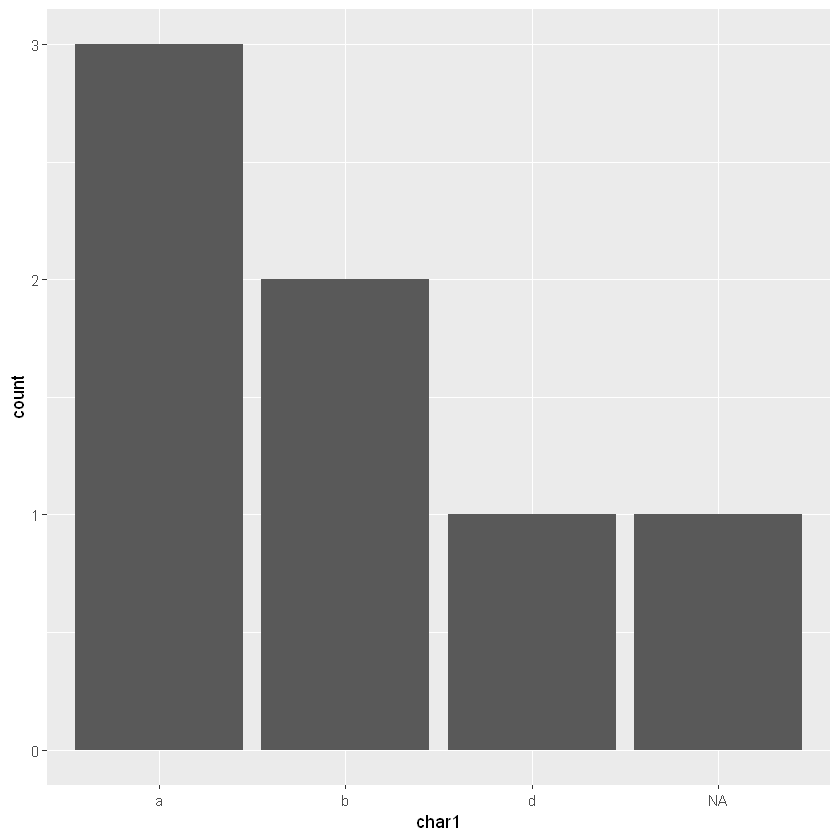

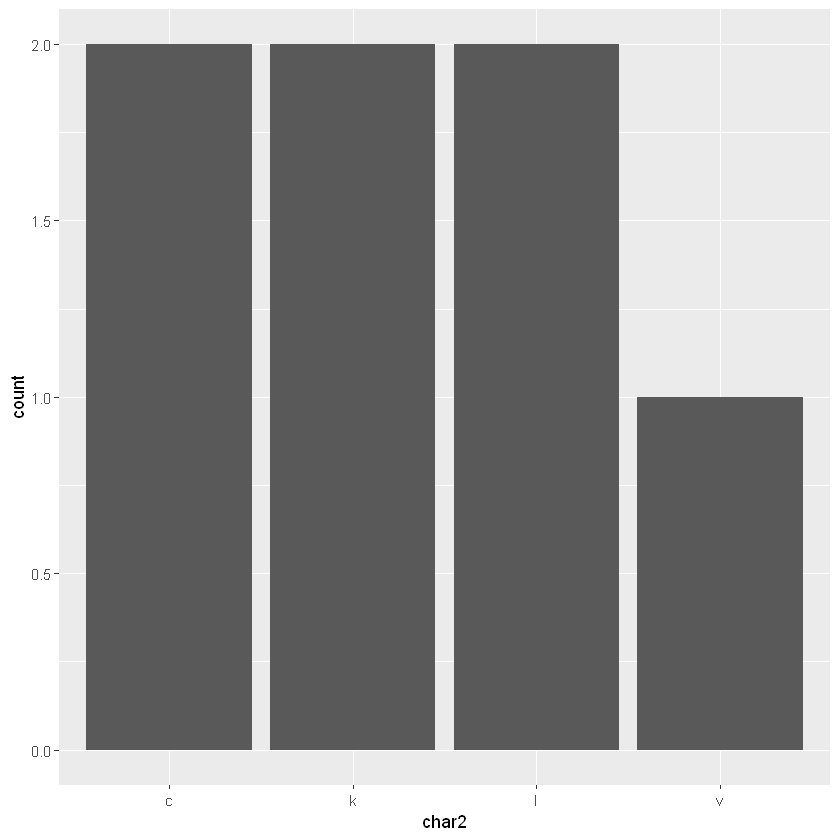

In [48]:
barall <- function(d)
{
  for(i in 1:ncol(d))
   {if(is.numeric(d[,i]) == FALSE)
   {print(ggplot(d) + geom_bar(mapping = aes(x=d[,i], fill = NULL), position= "dodge")+labs(x = names(d)[i]))
  }
}
}
barall(testdata)

### 8.Write a function that inputs a dataset and two number i, j and outputs bar charts of column i and column j.  If either i or j are not categorical variables, output a message saying so.

[1] "Both variables are not categorical"


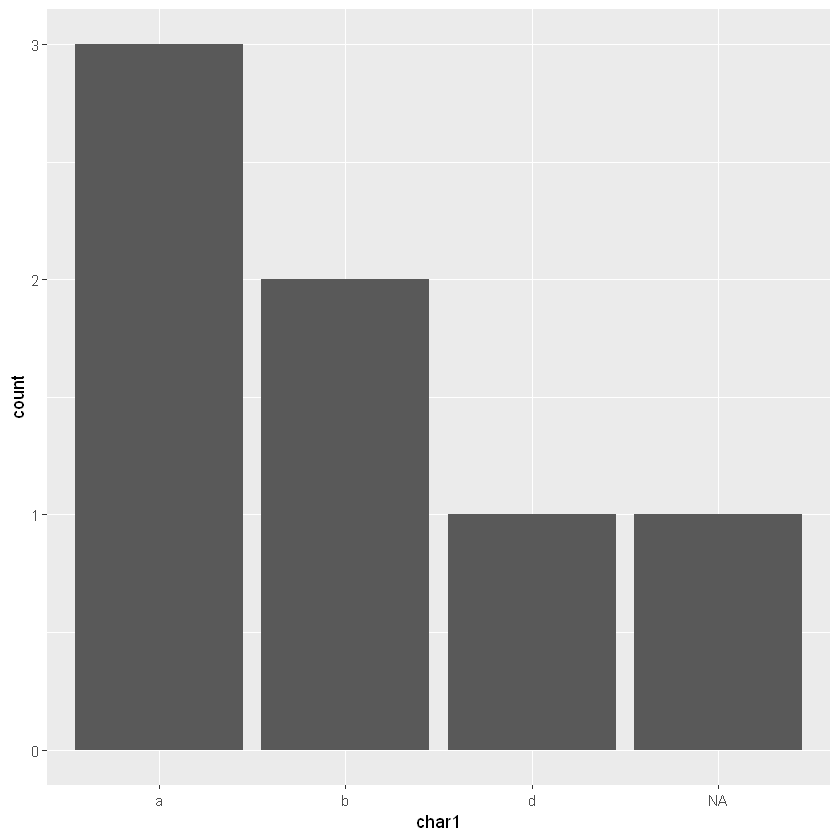

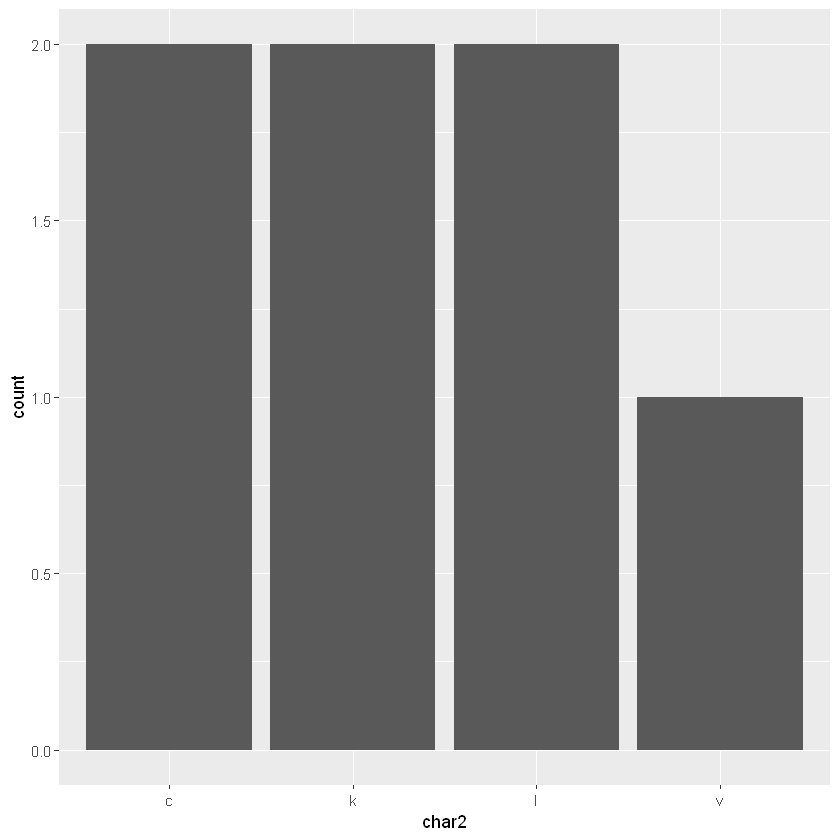

In [49]:
doublebar <-function(d, i, j)
{
  if (is.numeric(d[,i]) == TRUE | is.numeric(d[,j]) == TRUE)
  {
    print("Both variables are not categorical")
  }
  else
  {
    print(ggplot(d) + geom_bar(mapping = aes(x=d[,i], fill = NULL), position= "dodge")+labs(x = names(d)[i]))
    print(ggplot(d) + geom_bar(mapping = aes(x=d[,j], fill = NULL), position= "dodge")+labs(x = names(d)[j]))
  }
}

doublebar(testdata, 2,3)
doublebar(testdata, 4,5)

### 9.  Write a function that inputs a dataset and two number i, j and outputs the scatter plot of column i and column j. If either i or j are not numeric variables, output a message saying so


[1] "Both columns are not numeric"


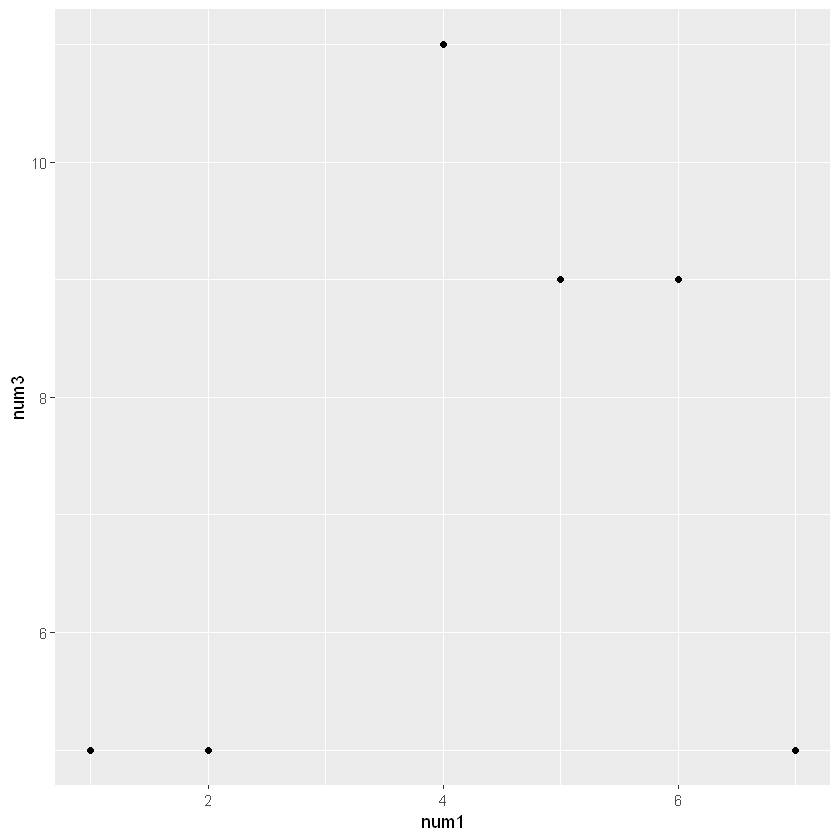

In [50]:
scatman <-function(d, i, j)
{
  if (is.numeric(d[,i]) == TRUE & is.numeric(d[,j]) == TRUE)
  {
      print(ggplot(d) + geom_point(mapping = aes(x=d[,i], y = d[,j] ),na.rm = TRUE)+labs(x = names(d)[i], y = names(d)[j]))}
  else
  {
 print("Both columns are not numeric")
  }
}

scatman(testdata, 1,3)
scatman(testdata, 4,5)

### 10.	Write a function that inputs a dataset and two number i, j and output the density curves of column i partitioning on categories of column j. If the two columns are not suitable for the graph, print out the message saying so. 

Warning message:
"Groups with fewer than two data points have been dropped."

[1] "Columns are not suitable"
[1] "Columns are not suitable"


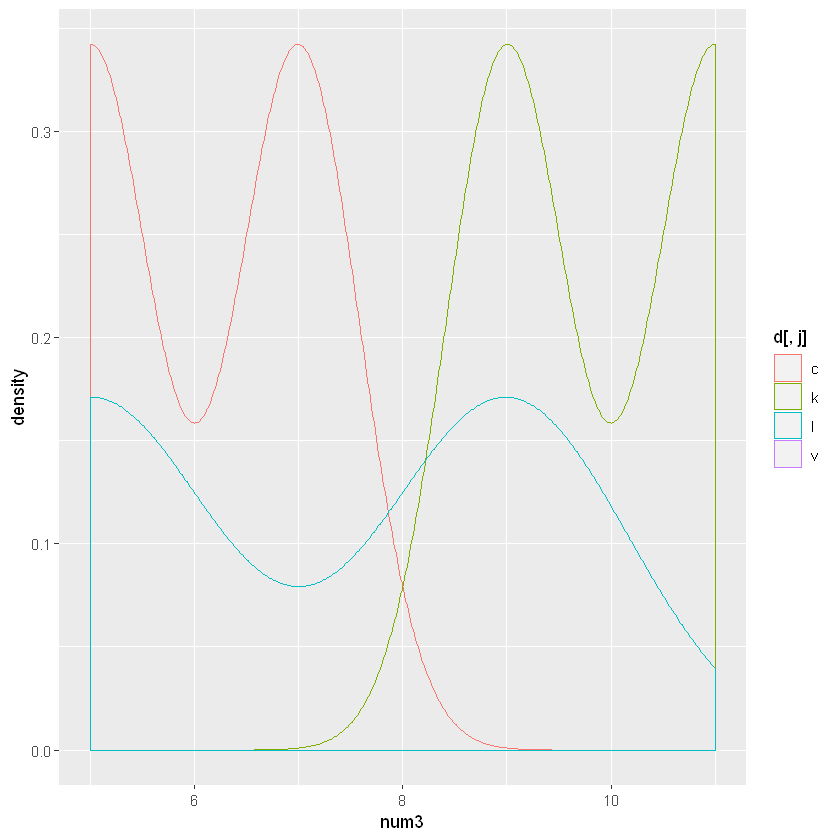

In [51]:
densityij <- function(d,i,j)
{
if(is.numeric(d[,i]) == TRUE & is.numeric(d[,j]) == FALSE)
{print(ggplot(d) + geom_density(mapping = aes(x=d[,i], color = d[,j]))+labs(x = names(d)[i]))}
  else
  {print("Columns are not suitable")}
}
  
densityij(testdata, 3, 5)
densityij(testdata, 3, 2)
densityij(testdata, 4, 5)

### 11.	Write a function that inputs a dataset and output all possible bar charts of pair of variables in the dataset. 

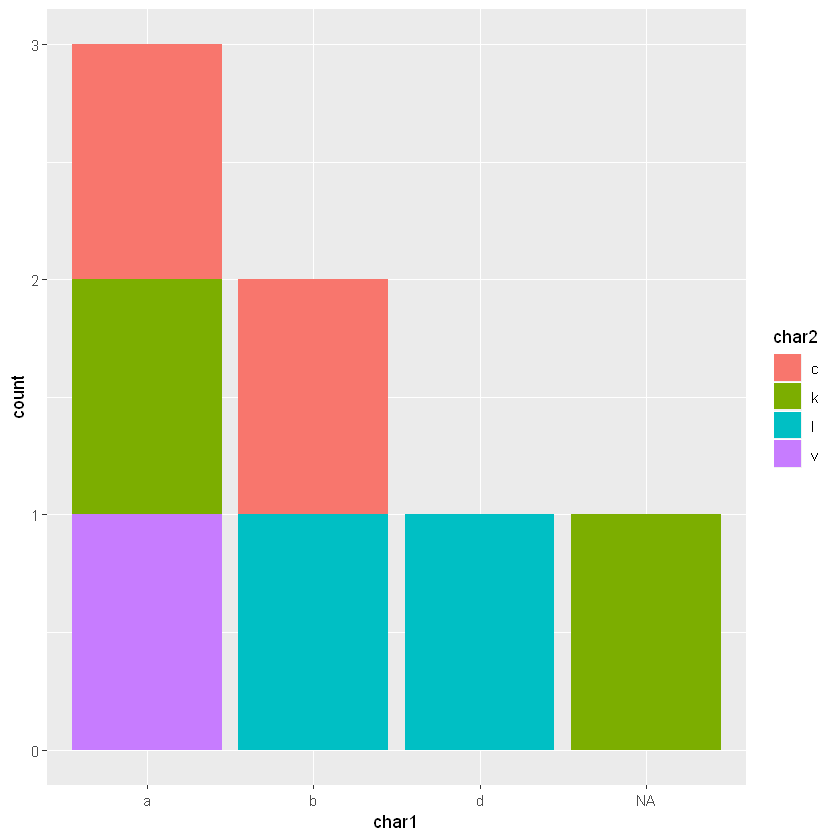

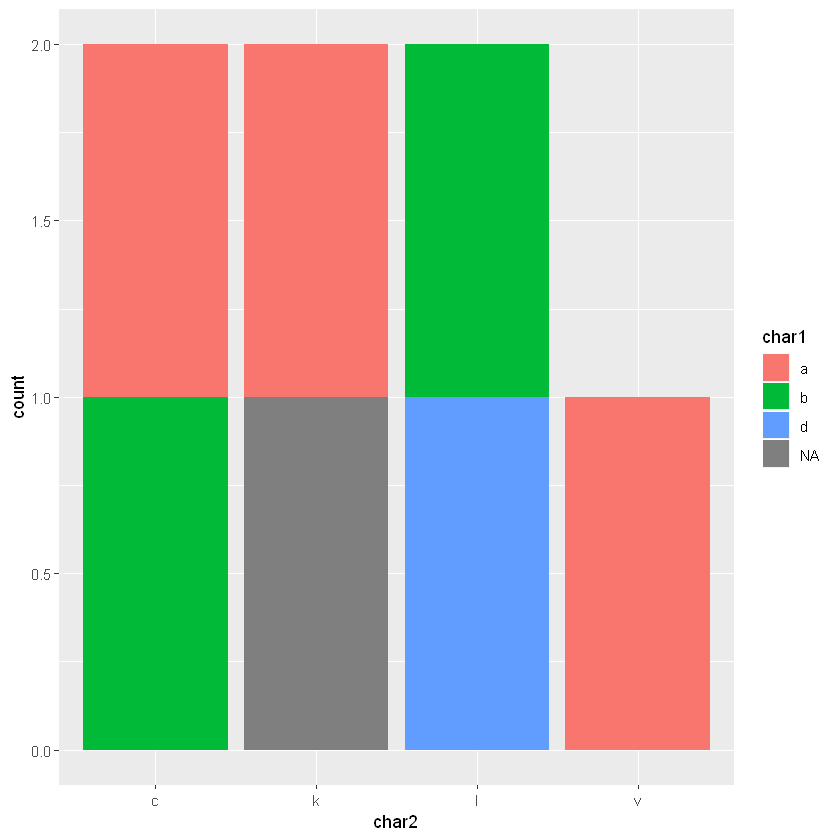

In [52]:
barpair <- function(d)
  for(i in 1:ncol(d))
      {for(j in 1:ncol(d))
        {if(is.numeric(d[,j]) == FALSE & (is.numeric(d[,i])==FALSE) & i != j)
        {print(ggplot(d) + geom_bar(mapping = aes(x=d[,i], fill = d[,j]),na.rm = TRUE)+labs(x = names(d)[i], fill = names(d)[j]))}
      }
    }
  
barpair(testdata)

### 12.	Write a function that inputs a dataset and output all possible density curves of variables in the dataset. 
#### *Already Completed in number 6

### 13.	Write a function that do visualization of a dataset, i.e. the function should output a set of several graphs of the variables

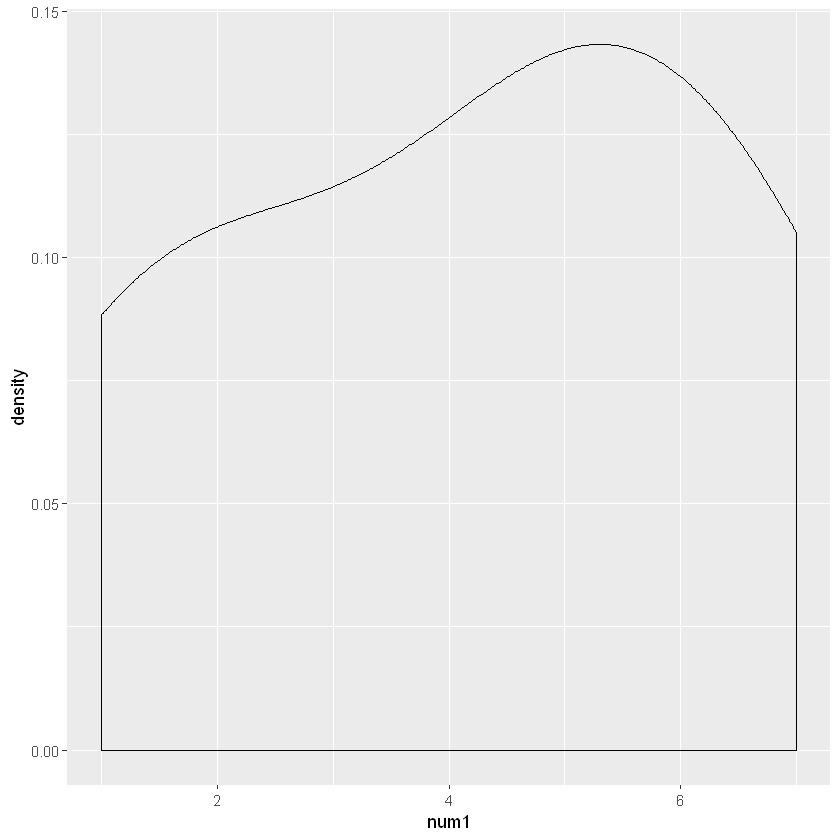

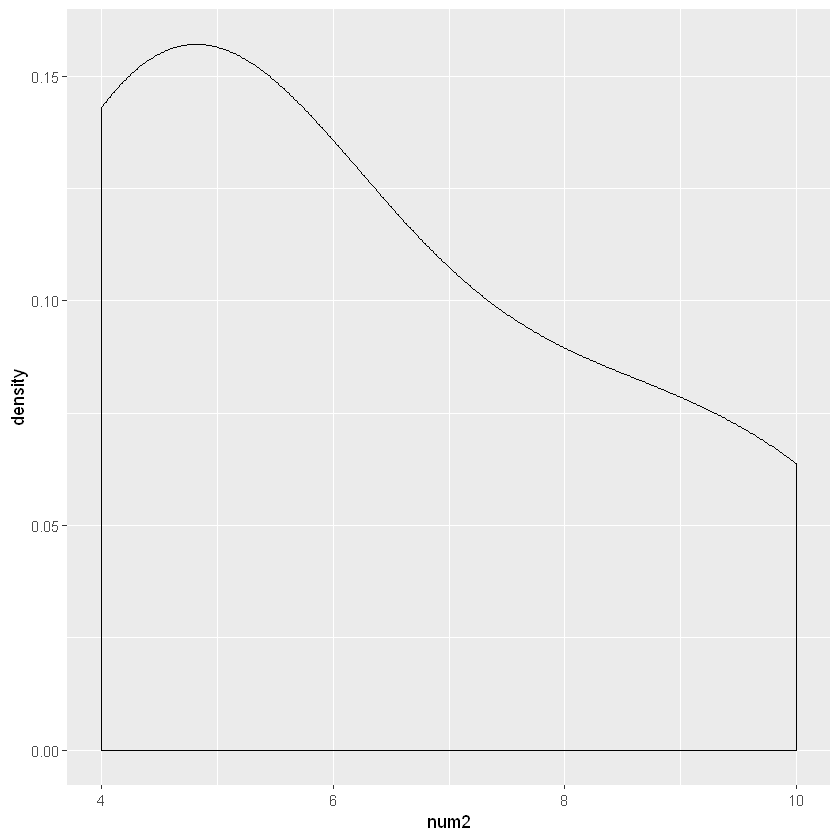

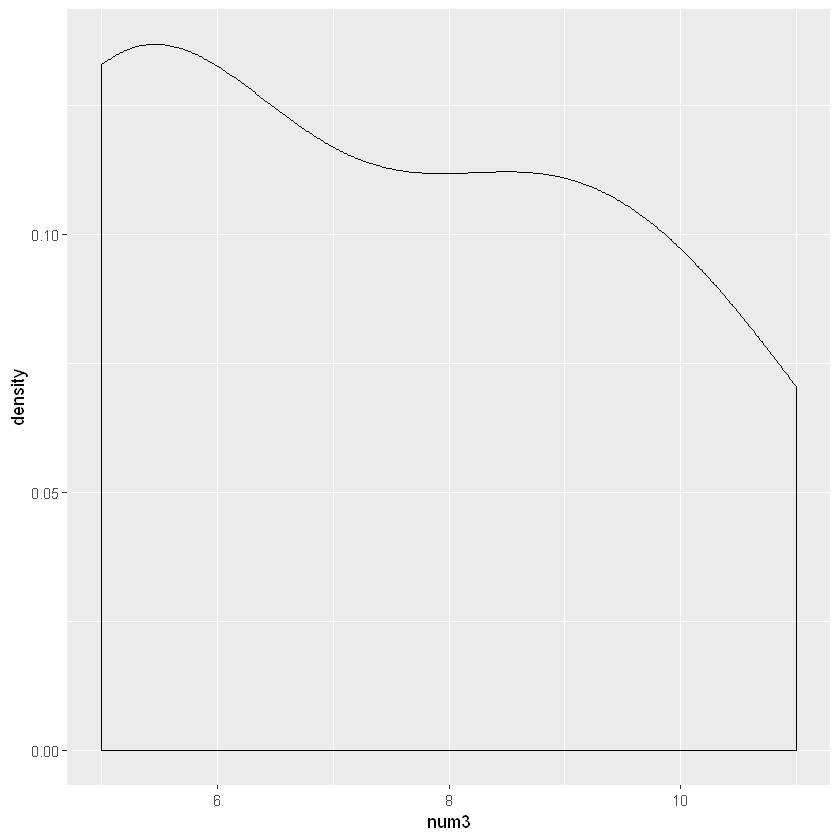

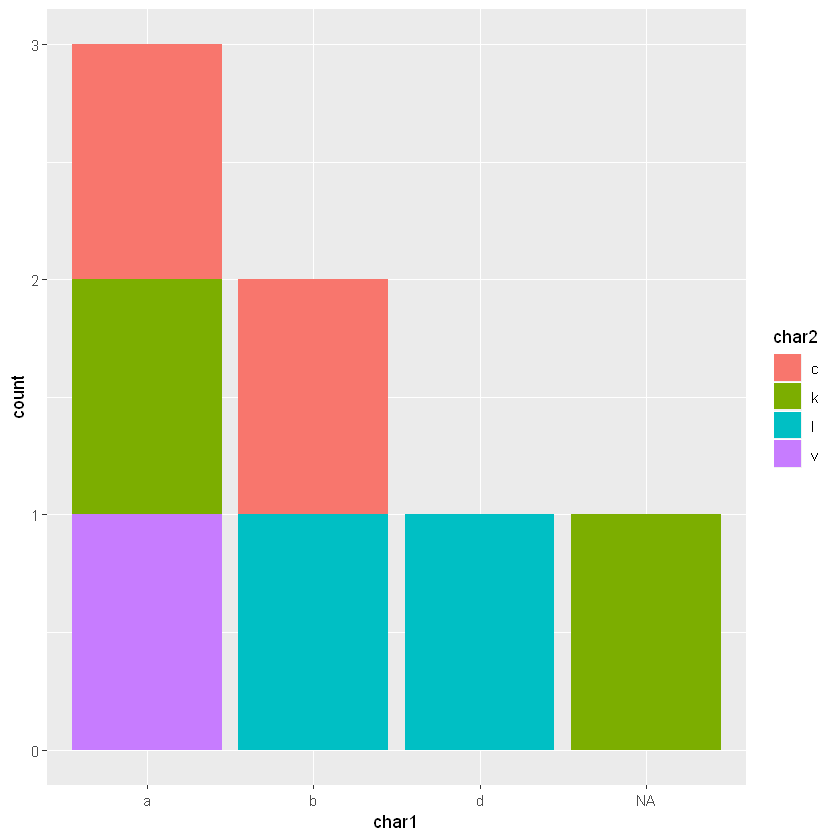

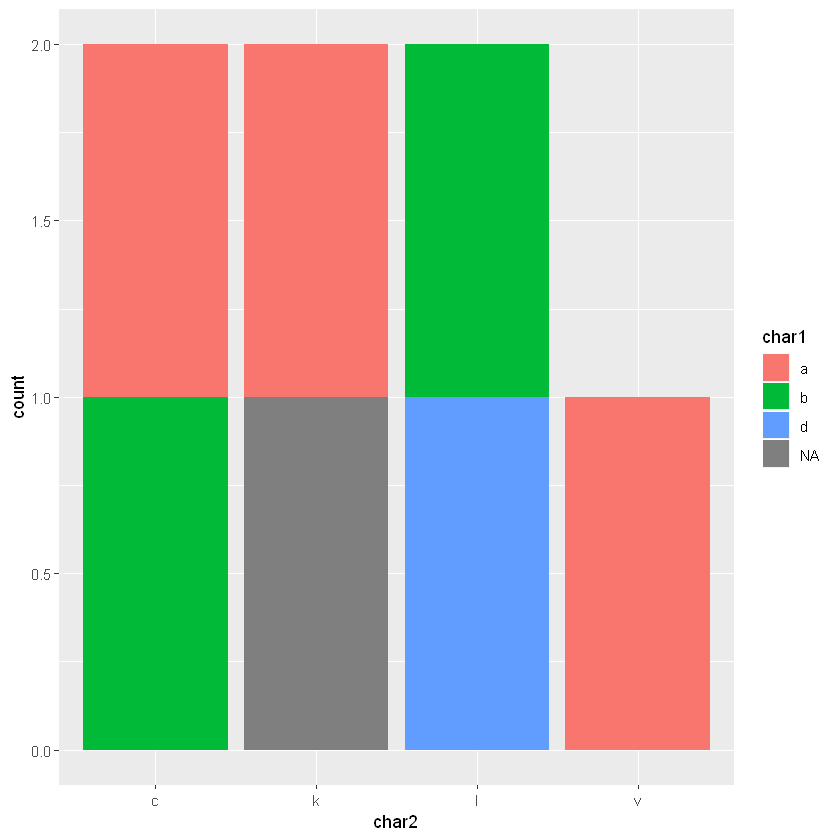

In [53]:
visualization <- function(d)
{for(i in 1:ncol(d))
{if(is.numeric(d[,i])==FALSE)
      {for(j in 1:ncol(d))
        {if(is.numeric(d[,j]) == FALSE & i  != j)
        {print(ggplot(d) + geom_bar(mapping = aes(x=d[,i], fill = d[,j]),na.rm = TRUE)+labs(x = names(d)[i], fill = names(d)[j]))}
      }
}

  else if(is.numeric(d[,i]))
   {print(ggplot(d) + geom_density(mapping = aes(x=d[,i],  color = NULL),na.rm = TRUE)+labs(x = names(d)[i]))}
  }
}


visualization(testdata)